### imports


In [42]:
import os
import pandas as pd
import numpy as np
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
import pickle
from google.colab.patches import cv2_imshow

### pre-processing Data

In [43]:
rgb = []
color = []

for dirname, _, filenames in os.walk('/content/training_dataset'):
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)
        rgb.append(image[0][0])
        color.append(dirname[26:])

In [44]:
rgb_df = pd.DataFrame(np.array(rgb), columns=['red', 'green', 'blue'])
rgb_df.head()

,red,green,blue
0,210,209,205
1,191,189,193
2,205,204,208
3,242,233,228
4,248,249,254


In [45]:
color_df = pd.DataFrame(
    {
        'color': color
    }
)

color_df.head()

,color
0,white
1,white
2,white
3,white
4,white


In [46]:
df = rgb_df.join(color_df)
df.head()

,red,green,blue,color
0,210,209,205,white
1,191,189,193,white
2,205,204,208,white
3,242,233,228,white
4,248,249,254,white


In [47]:
red = df['red']
green = df['green']
blue = df['blue']

x = df.iloc[:, 0:3]

y= df.iloc[:, -1]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
x_train.shape

(175, 3)

### K-NN Model

In [50]:
k = 30
neighbors = []
accuracy = []

for i in range(k):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    neighbors.append(i+1)
    accuracy.append(accuracy_score(y_test, y_pred))

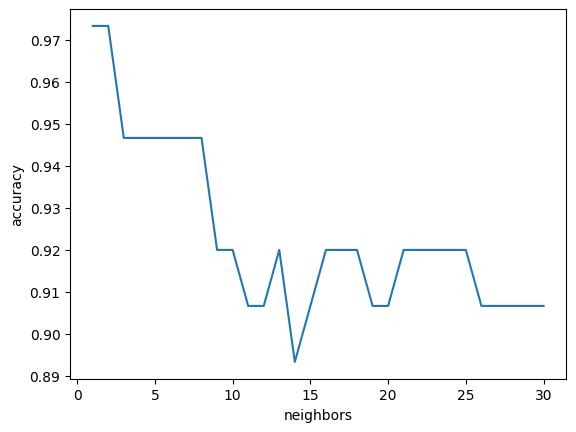

In [51]:
plt.plot(neighbors, accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

In [52]:
accuracy_df = pd.DataFrame(
    {
        'neighbors': neighbors,
        'accuracy': accuracy
    }
)

accuracy_df.head()

,neighbors,accuracy
0,1,0.973333
1,2,0.973333
2,3,0.946667
3,4,0.946667
4,5,0.946667


In [53]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
knn = knn.fit(x_train, y_train)

In [75]:
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100)

accuracy:  97.33333333333334


### testing 

In [66]:
def crop_center(img,cropx,cropy): # to crop and get the center of the given image
    y,x, channels = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)

    return img[starty:starty+cropy,startx:startx+cropx]

In [67]:
rgb2 =[]
cropped_img_list =[]
original_images = []
for dirname, _, filenames in os.walk('/content/results/results'):
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)
        original_images.append(image)
        crop_img = crop_center(image, 15, 15)
        cropped_img_list.append(crop_img)
        # crop_img_reshaped = np.reshape(crop_img[20][20],(1,3))
        rgb2.append(crop_img[0][0])

np_rgb2 = np.array(rgb2)
cropped_img_np = np.array(cropped_img_list)
original_images_np = np.array(original_images)

<ipython-input-67-beeeaaa1e7bd>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  original_images_np = np.array(original_images)


In [72]:
pred = knn.predict(np_rgb2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


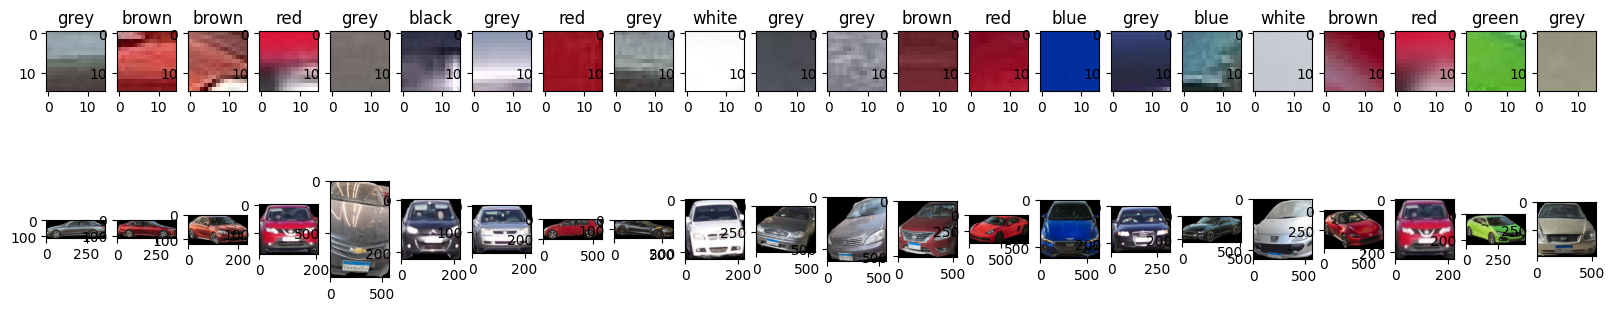

In [70]:
n = 22
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(cropped_img_np[i])
    ax.set_title(pred[i])
    ax = plt.subplot(2 , n , i+1+n)

    plt.imshow(original_images_np[i])

plt.show()
